# (Core) Project 4 - Part 1

# Task
Your task is to answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.

- Stakeholder Questions to Answer (pick at least 3 topics) Select 3 or more of the following topics to analyze:
 - Topic 1) Comparing Police Districts:
   - Which district has the most crimes? Which has the least?
 - Topic 2) Crimes Across the Years:
   - Is the total number of crimes increasing or decreasing across the years?
   - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?
 - Topic 3) Comparing AM vs. PM Rush Hour:
   - Are crimes more common during AM rush hour or PM rush hour?
        - You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
        - You can consider any crime that occurred between 4 -7 PM as PM rush hour.
   - What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
   - Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
 - Topic 4) Comparing Months:
   - What months have the most crime? What months have the least?
   - Are there any individual crimes that do not follow this pattern? If so, which crimes?
 - Topic 5) Comparing Holidays:
   - Are there any holidays that show an increase in the # of crimes?
   - Are there any holidays that show a decrease in the # of crimes?

# Prepare Chicago Crime Data for a GitHub Repository

- Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
- Updated 11/17/22

>- This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.

# INSTRUCTIONS

- 1) Go to the Chicago Data Portal's page for ["Crimes - 2001 to Preset"](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2).

- 2) Click on the Export button on the top right and select CSV. 
    - Save the file to your Downloads folder instead of your repository. **The file is too big for a repository.**
    
    
    
- 3) Wait for the full file to download. 
    - It is very large (over >1.7GB and may take several minutes to fully download.)
    
    
- 4) Once the download is complete, change `RAW_FILE` variable below to match the filepath to the downloaded file.

## 🚨 Set the correct `RAW_FILE` path

- The cell below will attempt to check your Downloads folder for any file with a name that contains "Crimes_-_2001_to_Present".
    - If you know the file path already, you can skip the next cell and just manually set the RAW_FILE variable in the following code cell.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import datetime as dt
from matplotlib import dates as mdates

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')


- Your Downloads folder is 'C:\Users\gleal\Downloads/'



<span style="color:red"> **IF THE CODE ABOVE DID NOT FIND YOUR DOWNLOADED FILE, UNCOMMENT AND CHANGE THE `"YOUR FILEPATH HERE"` VARIABLE ONLY IN THE CELL BELOW**

In [3]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
##RAW_FILE = r"YOUR FILEPATH HERE")

<span style="color:red"> **DO NOT CHANGE ANYTHING IN THE CELL BELOW**

In [4]:
## DO NOT CHANGE THIS CELL
if RAW_FILE == r"C:\Users\gleal\Desktop\Data\Crimes_-_2001_to_Present.csv":
	raise Exception("You must update the RAW_FILE variable in the previous cell to match your local filepath.")
	
RAW_FILE

'C:\\Users\\gleal\\Downloads\\Crimes_-_2001_to_Present.csv'

In [5]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# 🔄 Full Workflow

- Now that your RAW_FILE variable is set either:
    - On the toolbar, click on the Kernel menu > "Restart and Run All".
    - OR click on this cell first, then on the toolbar click on the "Cell" menu > "Run All Below"

In [6]:
chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7881014,13128007,JG325985,06/21/2023 08:00:00 PM,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,35.0,21.0,14,1157169.0,1920611.0,2023,08/19/2023 03:40:26 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)"
7881015,13128324,JG326502,05/13/2023 12:00:00 PM,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,...,25.0,31.0,10,1163211.0,1889404.0,2023,08/19/2023 03:40:26 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)"
7881016,13128375,JG326564,06/24/2023 01:29:00 PM,069XX N HAMILTON AVE,1330,CRIMINAL TRESPASS,TO LAND,RESIDENCE,False,False,...,40.0,2.0,26,1160740.0,1946176.0,2023,08/19/2023 03:40:26 PM,42.008004,-87.683946,"(42.008003927, -87.683946124)"
7881017,13129172,JG327619,06/20/2023 04:00:00 AM,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,35.0,21.0,08B,1158868.0,1918755.0,2023,08/19/2023 03:40:26 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)"


In [7]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
2451715,1311269,G001223,01/01/2001 01:00:00 AM,076XX S COLFAX AV,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,NaN,14,1194808.0,1854873.0,2001,08/17/2015 03:03:40 PM,41.756690,-87.561625,"(41.756689633, -87.561625217)",2001-01-01 01:00:00
2451669,1311144,G001320,01/01/2001 01:00:00 AM,063XX N LEAVITT ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1160455.0,1942042.0,2001,08/17/2015 03:03:40 PM,41.996666,-87.685110,"(41.99666603, -87.685109858)",2001-01-01 01:00:00
2451656,1311123,G001792,01/01/2001 01:00:00 AM,022XX W 21 ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1161720.0,1890066.0,2001,08/17/2015 03:03:40 PM,41.854014,-87.681909,"(41.854014083, -87.681908988)",2001-01-01 01:00:00
2648951,1584605,G351833,01/01/2001 01:00:00 AM,024XX W CORTLAND ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,NaN,26,1159701.0,1912508.0,2001,08/17/2015 03:03:40 PM,41.915639,-87.688701,"(41.915638736, -87.688700749)",2001-01-01 01:00:00
2451511,1310610,G000911,01/01/2001 01:00:00 AM,022XX W CORNELIA AV,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1160786.0,1923163.0,2001,08/17/2015 03:03:40 PM,41.944854,-87.684418,"(41.944854306, -87.684418276)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110797,13190010,JG399624,08/27/2023 12:00:00 AM,069XX W GEORGE ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,18.0,07,1129312.0,1918496.0,2023,09/03/2023 03:43:16 PM,41.932643,-87.800212,"(41.932643073, -87.800212441)",2023-08-27 12:00:00
110407,13194702,JG405308,08/27/2023 12:00:00 AM,080XX S THROOP ST,0265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,False,False,...,71.0,02,1169055.0,1851524.0,2023,09/03/2023 03:43:16 PM,41.748095,-87.656101,"(41.748094688, -87.65610137)",2023-08-27 12:00:00
110758,13195079,JG405595,08/27/2023 12:00:00 AM,106XX S ARTESIAN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - YARD (FRONT / BACK),False,True,...,72.0,14,1161925.0,1834107.0,2023,09/03/2023 03:43:16 PM,41.700451,-87.682711,"(41.700450626, -87.682710503)",2023-08-27 12:00:00
111471,13195303,JG405285,08/27/2023 12:00:00 AM,013XX S SAWYER AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,...,29.0,02,1154907.0,1893681.0,2023,09/03/2023 03:43:16 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",2023-08-27 12:00:00


## Separate the Full Dataset by Years

In [8]:
chicago_full['Datetime'].dt.year

2451715    2001
2451669    2001
2451656    2001
2648951    2001
2451511    2001
           ... 
110797     2023
110407     2023
110758     2023
111471     2023
109967     2023
Name: Datetime, Length: 7881019, dtype: int64

In [9]:
# save the years for every crime
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

2002    486807
2001    485886
2003    475985
2004    469422
2005    453773
2006    448179
2007    437086
2008    427183
2009    392827
2010    370514
2011    351993
2012    336319
2013    307537
2014    275789
2016    269823
2017    269103
2018    268900
2015    264788
2019    261329
2022    238875
2020    212200
2021    208826
2023    167875
Name: Year, dtype: int64

In [10]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [11]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,2001,41.756690,-87.561625
2001-01-01 01:00:00,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,2001,41.996666,-87.685110
2001-01-01 01:00:00,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,2001,41.854014,-87.681909
2001-01-01 01:00:00,1584605,01/01/2001 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,NaN,2001,41.915639,-87.688701
2001-01-01 01:00:00,1310610,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,2001,41.944854,-87.684418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27 12:00:00,13190010,08/27/2023 12:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2511,25.0,36.0,2023,41.932643,-87.800212
2023-08-27 12:00:00,13194702,08/27/2023 12:00:00 AM,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,False,False,612,6.0,17.0,2023,41.748095,-87.656101
2023-08-27 12:00:00,13195079,08/27/2023 12:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - YARD (FRONT / BACK),False,True,2211,22.0,19.0,2023,41.700451,-87.682711


In [12]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [13]:
FINAL_DROP = ['Year']

In [14]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [15]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [16]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



## Confirmation

- Follow the example usage above to test if your files were created successfully.

In [17]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f, nrows=5) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,41.756690,-87.561625
1,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,41.996666,-87.685110
2,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
3,1584605,01/01/2001 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,NaN,41.915639,-87.688701
4,1310610,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418
...,...,...,...,...,...,...,...,...,...,...,...,...
0,12938664,01/01/2023 01:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,CHA PARKING LOT / GROUNDS,False,False,533,5.0,9.0,41.656374,-87.607563
1,12940477,01/01/2023 01:00:00 AM,ROBBERY,ARMED - KNIFE / CUTTING INSTRUMENT,STREET,False,False,922,9.0,15.0,41.810238,-87.685881
2,12940500,01/01/2023 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,821,8.0,14.0,41.810540,-87.708698
3,12938864,01/01/2023 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2524,25.0,31.0,41.926884,-87.720720


In [18]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    5
2002    5
2003    5
2004    5
2005    5
2006    5
2007    5
2008    5
2009    5
2010    5
2011    5
2012    5
2013    5
2014    5
2015    5
2016    5
2017    5
2018    5
2019    5
2020    5
2021    5
2022    5
2023    5
Name: Date, dtype: int64

## Summary

- The chicago crime dataset has now been saved to your repository as csv files. 
- You should save your notebook, commit your work and push to GitHub using GitHub desktop.

In [19]:
import glob

folder = "Data/Chicago/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])

In [20]:
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,41.756690,-87.561625
1,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,41.996666,-87.685110
2,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
3,1584605,01/01/2001 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,NaN,41.915639,-87.688701
4,1310610,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418
...,...,...,...,...,...,...,...,...,...,...,...,...
167870,13190010,08/27/2023 12:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2511,25.0,36.0,41.932643,-87.800212
167871,13194702,08/27/2023 12:00:00 AM,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,False,False,612,6.0,17.0,41.748095,-87.656101
167872,13195079,08/27/2023 12:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - YARD (FRONT / BACK),False,True,2211,22.0,19.0,41.700451,-87.682711
167873,13195303,08/27/2023 12:00:00 AM,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,APARTMENT,False,True,1022,10.0,24.0,41.864073,-87.706819


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7881019 entries, 0 to 167874
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 676.4+ MB


In [22]:
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y %I:%M:%S %p')

df['Date']

0        2001-01-01 01:00:00
1        2001-01-01 01:00:00
2        2001-01-01 01:00:00
3        2001-01-01 01:00:00
4        2001-01-01 01:00:00
                 ...        
167870   2023-08-27 00:00:00
167871   2023-08-27 00:00:00
167872   2023-08-27 00:00:00
167873   2023-08-27 00:00:00
167874   2023-08-27 00:00:00
Name: Date, Length: 7881019, dtype: datetime64[ns]

In [23]:
df_chicago = df.set_index('Date')

df_chicago

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1311269,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,41.756690,-87.561625
2001-01-01 01:00:00,1311144,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,41.996666,-87.685110
2001-01-01 01:00:00,1311123,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
2001-01-01 01:00:00,1584605,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,NaN,41.915639,-87.688701
2001-01-01 01:00:00,1310610,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-27 00:00:00,13190010,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2511,25.0,36.0,41.932643,-87.800212
2023-08-27 00:00:00,13194702,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,False,False,612,6.0,17.0,41.748095,-87.656101
2023-08-27 00:00:00,13195079,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - YARD (FRONT / BACK),False,True,2211,22.0,19.0,41.700451,-87.682711


In [24]:
df_chicago_resamp = df_chicago.copy()
df_chicago_resamp['Total Crimes'] = 1

# resample and count with .sum()
df_chicago_resamp = df_chicago_resamp.resample('D').size()

df_chicago_resamp.head()

Date
2001-01-01    1825
2001-01-02    1143
2001-01-03    1151
2001-01-04    1166
2001-01-05    1267
Freq: D, dtype: int64

The original individual crime data with a datetime index. (Each row is 1 crime)

A resampled/converted crime counts version (Each row is 1 day)

## Topic 1) Comparing Police Districts:
### Which district has the most crimes? Which has the least?

In [25]:
chicago_most_crimes = df_chicago['District'].value_counts()
chicago_most_crimes

8.0     529248
11.0    505135
6.0     460889
7.0     454439
25.0    447999
4.0     447402
3.0     399661
12.0    391320
9.0     384713
2.0     373624
19.0    354560
18.0    354084
5.0     348890
10.0    339594
15.0    336862
1.0     319942
14.0    304627
16.0    264065
22.0    258163
24.0    238465
17.0    227418
20.0    139621
31.0       247
21.0         4
Name: District, dtype: int64

## District 8 has the most crimes being commited with 529248

## District 21 has the least amount of crimes with 4

## Topic 2) Crimes Across the Years:
### 2A)Is the total number of crimes increasing or decreasing across the years?


In [26]:
chicago_final.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,2001,41.756690,-87.561625
2001-01-01 01:00:00,1311144,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2413,24.0,NaN,2001,41.996666,-87.685110
2001-01-01 01:00:00,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,2001,41.854014,-87.681909
2001-01-01 01:00:00,1584605,01/01/2001 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,NaN,2001,41.915639,-87.688701
2001-01-01 01:00:00,1310610,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,2001,41.944854,-87.684418


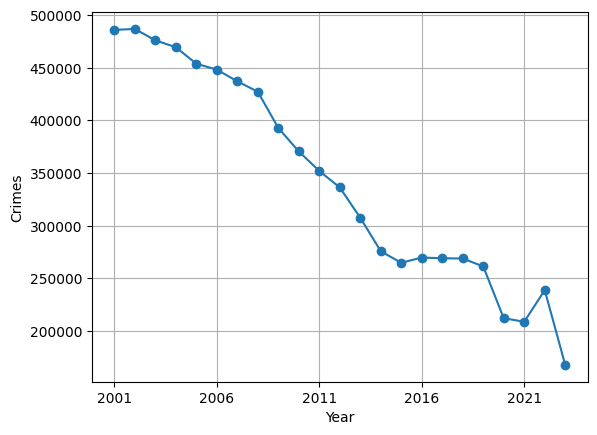

In [27]:
total_crimes =chicago_final['Year'].value_counts().sort_index()
total_crimes.plot(style='o-',grid=True,ylabel='Crimes', xlabel='Year');

## The visualization shows that crime is decreasing throughout the years.

## 2B)Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [28]:
chicago_final['Primary Type'].value_counts()

THEFT                                1663152
BATTERY                              1439510
CRIMINAL DAMAGE                       898511
NARCOTICS                             749341
ASSAULT                               515679
OTHER OFFENSE                         489188
BURGLARY                              426998
MOTOR VEHICLE THEFT                   385948
DECEPTIVE PRACTICE                    351414
ROBBERY                               296188
CRIMINAL TRESPASS                     215918
WEAPONS VIOLATION                     109759
PROSTITUTION                           69910
OFFENSE INVOLVING CHILDREN             56457
PUBLIC PEACE VIOLATION                 52644
SEX OFFENSE                            31295
CRIM SEXUAL ASSAULT                    27583
INTERFERENCE WITH PUBLIC OFFICER       18572
LIQUOR LAW VIOLATION                   14972
GAMBLING                               14623
ARSON                                  13438
HOMICIDE                               12810
CRIMINAL S

In [29]:
crimes_by_year = chicago_final.groupby('Primary Type')['Year'].value_counts().sort_index()
crimes_by_year

Primary Type       Year
ARSON              2001    1011
                   2002    1032
                   2003     955
                   2004     778
                   2005     691
                           ... 
WEAPONS VIOLATION  2019    6339
                   2020    8432
                   2021    8980
                   2022    8766
                   2023    5853
Name: Year, Length: 720, dtype: int64

In [30]:
plot_df = crimes_by_year.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,Year,# of Crimes
0,ARSON,2001,1011
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691
...,...,...,...
715,WEAPONS VIOLATION,2019,6339
716,WEAPONS VIOLATION,2020,8432
717,WEAPONS VIOLATION,2021,8980
718,WEAPONS VIOLATION,2022,8766


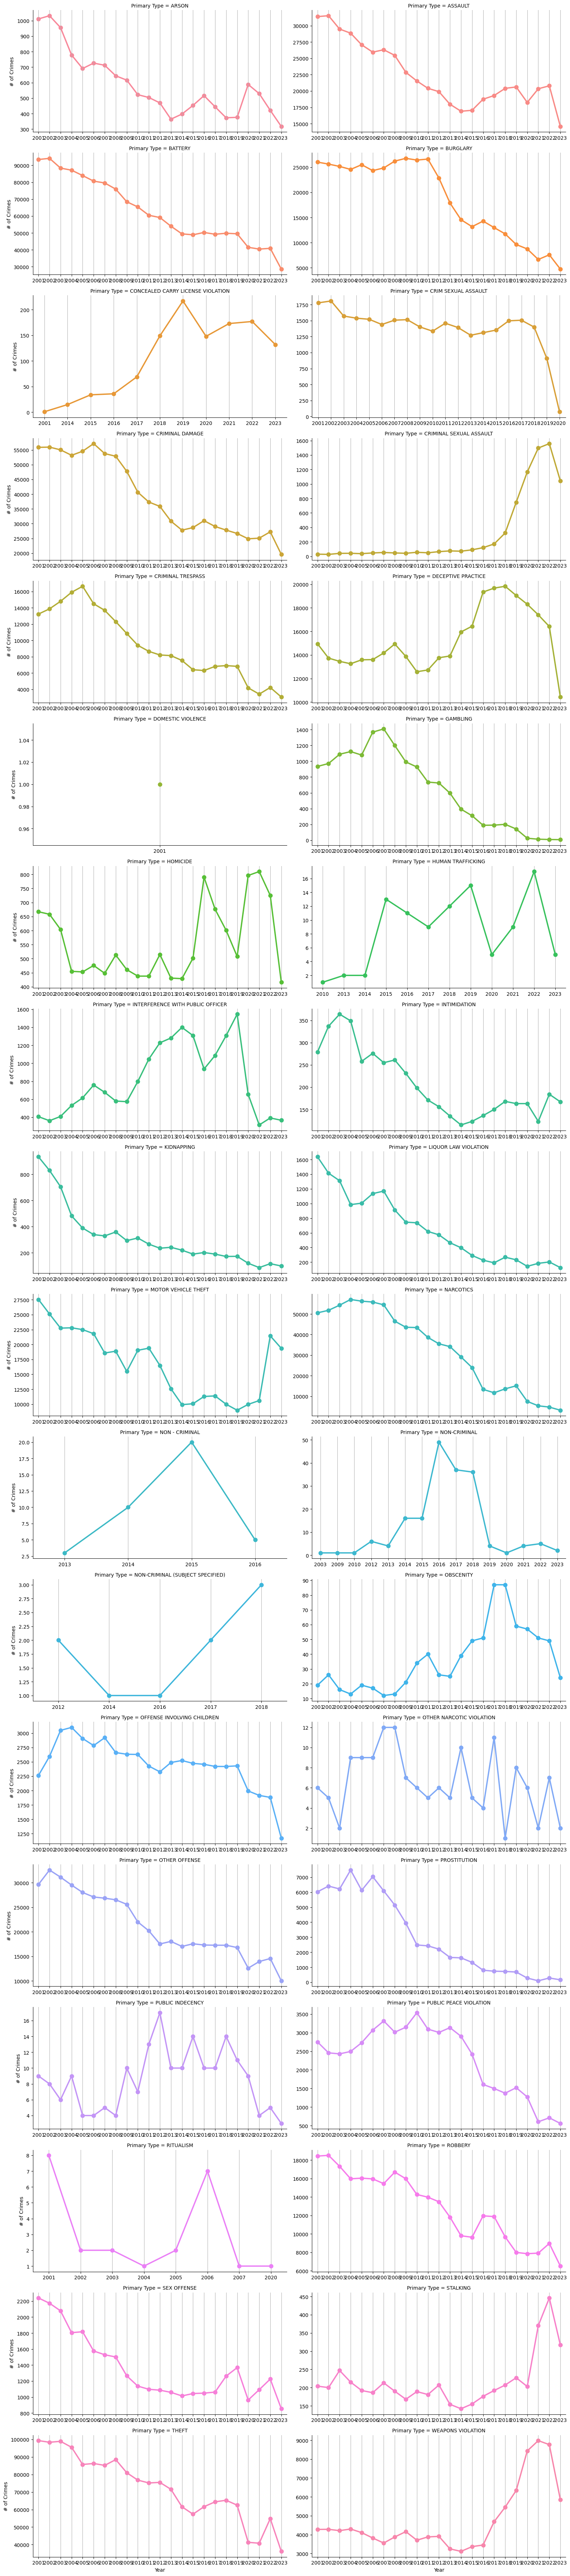

In [31]:
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

### Most crimes have been descending overall year by year but there are a few types that have had recent upticks that I want to point out and they are concealed carry license violation, criminal sexual assualt, deceptive practice, homicide, human trafficking, motor vehicle theft, stalking, weapons violation.

## Topic 4) Comparing Months:
### What months have the most crime? What months have the least?
### Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [32]:
df_month = df.copy()
df_month['Month'] = df_month['Date'].dt.month_name()

In [33]:
crime_per_month = df_month['Month'].value_counts(dropna = False)

crime_per_month

July         740774
August       730061
May          704921
June         704078
October      676286
September    668248
March        650261
April        647744
January      622216
November     608963
December     579774
February     547693
Name: Month, dtype: int64

### July, August, and May have the most crime while February, December, and November have the least amount of crime.

In [34]:
df_month['Primary Type'].value_counts()

THEFT                                1663152
BATTERY                              1439510
CRIMINAL DAMAGE                       898511
NARCOTICS                             749341
ASSAULT                               515679
OTHER OFFENSE                         489188
BURGLARY                              426998
MOTOR VEHICLE THEFT                   385948
DECEPTIVE PRACTICE                    351414
ROBBERY                               296188
CRIMINAL TRESPASS                     215918
WEAPONS VIOLATION                     109759
PROSTITUTION                           69910
OFFENSE INVOLVING CHILDREN             56457
PUBLIC PEACE VIOLATION                 52644
SEX OFFENSE                            31295
CRIM SEXUAL ASSAULT                    27583
INTERFERENCE WITH PUBLIC OFFICER       18572
LIQUOR LAW VIOLATION                   14972
GAMBLING                               14623
ARSON                                  13438
HOMICIDE                               12810
CRIMINAL S

In [35]:
monthly_crimes_by_type = df_month.groupby('Primary Type')['Month'].value_counts().sort_index()
monthly_crimes_by_type

Primary Type       Month    
ARSON              April         1133
                   August        1212
                   December       923
                   February       840
                   January        963
                                ...  
WEAPONS VIOLATION  March         8801
                   May          10757
                   November      7952
                   October       9190
                   September     9435
Name: Month, Length: 415, dtype: int64

In [36]:
plot_month = monthly_crimes_by_type.to_frame('# of Crimes').reset_index()
plot_month

,Primary Type,Month,# of Crimes
0,ARSON,April,1133
1,ARSON,August,1212
2,ARSON,December,923
3,ARSON,February,840
4,ARSON,January,963
...,...,...,...
410,WEAPONS VIOLATION,March,8801
411,WEAPONS VIOLATION,May,10757
412,WEAPONS VIOLATION,November,7952
413,WEAPONS VIOLATION,October,9190


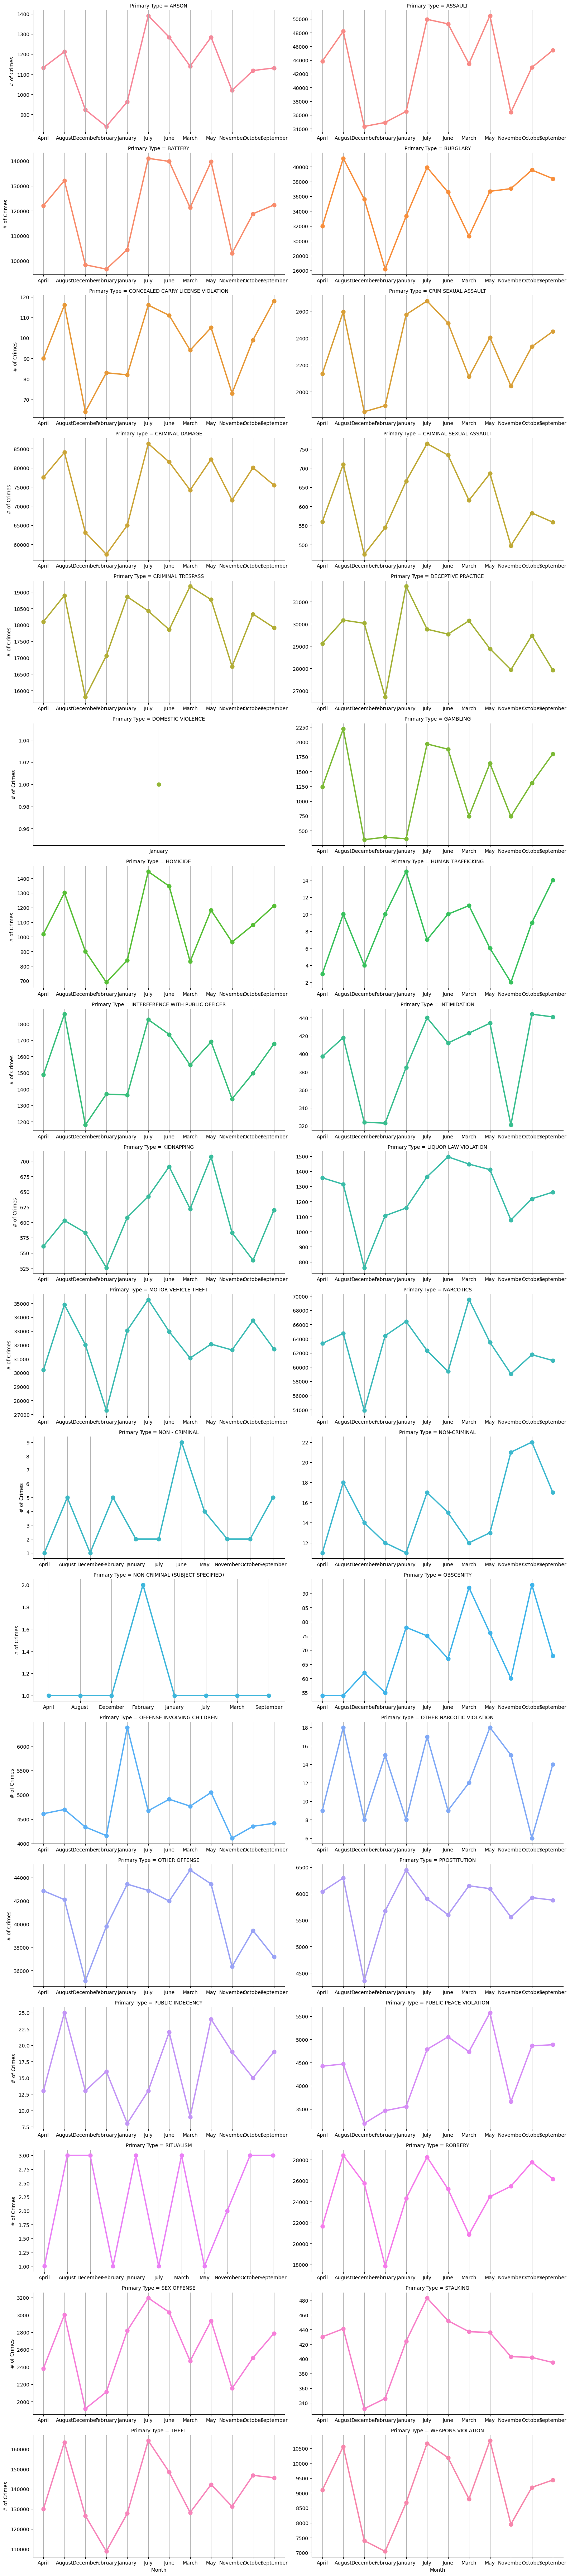

In [37]:
g = sns.catplot(data=plot_month, x='Month', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

### There are a few individual crimes that do not fit the pattern as well as the others and they are narcotics, deceptive practice, human trafficking, kidnapping, obscenity, offense involving children, public peace violation. The rest of the crimes seem to follow the patter.

